### Data Understanding and Cleaning

In [2]:
#importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

In [3]:
#read the dataset
digits = pd.read_csv('train.csv')
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
#looking at our data
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#lets see te shape of a data
four = digits.iloc[3, 1:]
four.shape

(784,)

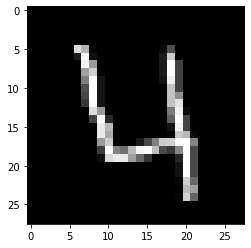

In [12]:
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')

In [19]:
print(four[5:-5, 5:-5])

[[  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182  10   0]
 [  0   0   0   0 154 205   4   0   0  26  72 128 203 208 254 254 131   0]
 [  0   0   0   0  61 254

In [22]:
#summarise the counts of label to see how many labels of each digit are present
digits.label.astype('category').value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [23]:
#summarise counts in terms of percenrtage
100 * (round(digits.label.astype('category').value_counts()/len(digits.index), 4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [24]:
#see if there is any missing values
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [25]:
#average value/ distribution of features
description = digits.describe()
description

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Data preparation for model building

In [26]:
#seperating feature and labels
X = digits.iloc[:, 1:]
y = digits.iloc[:, 0]

#scaling the features
from sklearn.preprocessing import scale
X = scale(X)

#splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.10, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4200, 784)
(37800, 784)
(4200,)
(37800,)


In [27]:
#deleting test set from memory to avoid memory error
#here we will use cv to evaluate the model and can seperate test.csv file as well to ealuate the model finally

#del x_test
#del y_test

### Model Building

In [28]:
#trying with linear svm
from sklearn import svm
from sklearn import metrics

#with kernel=linear
svm_linear = svm.SVC(kernel='linear')

#fit
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
#predict
predictions = svm_linear.predict(X_test)
predictions[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6])

In [30]:
#evaluation of model
confusion_matrixe = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion_matrixe

array([[3615,    0,   12,    8,    8,   28,   28,    5,    9,    2],
       [   0, 4089,   16,   23,    9,    3,    3,   13,   25,    4],
       [  54,   48, 3363,   64,   74,   13,   53,   52,   59,   10],
       [  20,   28,  121, 3387,    8,  175,    5,   54,   58,   44],
       [  12,   12,   26,    2, 3399,    7,   41,   41,    4,  158],
       [  49,   42,   32,  177,   41, 2899,   54,   14,   82,   28],
       [  36,   16,   55,    5,   34,   37, 3486,    3,   21,    0],
       [   9,   27,   37,   22,   70,   10,    4, 3619,   14,  142],
       [  26,   86,   71,  137,   24,  137,   29,   26, 3096,   33],
       [  38,   11,   39,   26,  182,   19,    1,  207,   27, 3228]])

In [31]:
#accuracy
metrics.accuracy_score(y_true=y_test, y_pred=predictions)


0.9042592592592592

In [32]:
#class wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3715
           1       0.94      0.98      0.96      4185
           2       0.89      0.89      0.89      3790
           3       0.88      0.87      0.87      3900
           4       0.88      0.92      0.90      3702
           5       0.87      0.85      0.86      3418
           6       0.94      0.94      0.94      3693
           7       0.90      0.92      0.91      3954
           8       0.91      0.84      0.88      3665
           9       0.88      0.85      0.87      3778

    accuracy                           0.90     37800
   macro avg       0.90      0.90      0.90     37800
weighted avg       0.90      0.90      0.90     37800



In [33]:
#running gc.collect() -garbage collect to free up some memory
#else, since the dataset is large and SVM is computationally heavy,
#it will throw a memory error
gc.collect()

24

### Non-linear SVM

In [35]:
#trying a non linear kerne; with default values of C and gamma
svm_rbf = svm.SVC(kernel='rbf', gamma='auto')
svm_rbf.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
#predictions
predictions = svm_rbf.predict(X_test)

#accuracy
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.9255820105820106


In [43]:
#lets see if we can get more accuracy by tuning the hyperparameters
from sklearn.model_selection import GridSearchCV
parameters = {"C": [1,10,100],
             "gamma": [1e-2, 1e-3, 1e-4]}

#instantiate a model
svc_grid_search = svm.SVC(kernel="rbf")

#create the classifier
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy', return_train_score=True)

#fit
clf.fit(X_train, y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [44]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,22.550601,0.442360,5.792780,0.017264,1,0.01,"{'C': 1, 'gamma': 0.01}",0.723450,0.707857,0.712241,0.714524,0.006570,9,1.000000,1.000000,1.000000,1.000000,0.000000
1,7.488085,0.072292,3.984394,0.018662,1,0.001,"{'C': 1, 'gamma': 0.001}",0.919458,0.905714,0.914102,0.913095,0.005659,4,0.964962,0.967500,0.967892,0.966785,0.001298
2,11.000694,0.123256,5.118030,0.020139,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.867427,0.864286,0.872584,0.868095,0.003419,6,0.891312,0.890000,0.893329,0.891547,0.001369
3,22.702120,0.040826,5.849315,0.046549,10,0.01,"{'C': 10, 'gamma': 0.01}",0.742694,0.727143,0.732283,0.734048,0.006473,7,1.000000,1.000000,1.000000,1.000000,0.000000
4,6.481844,0.064107,3.709976,0.018118,10,0.001,"{'C': 10, 'gamma': 0.001}",0.937990,0.914286,0.916249,0.922857,0.010748,1,0.999285,0.999643,1.000000,0.999643,0.000292
5,5.077677,0.103853,3.380434,0.039852,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.920171,0.906429,0.913386,0.913333,0.005613,3,0.959957,0.959286,0.958259,0.959167,0.000698
6,22.705771,0.044825,5.805318,0.015840,100,0.01,"{'C': 100, 'gamma': 0.01}",0.742694,0.727143,0.732283,0.734048,0.006473,7,1.000000,1.000000,1.000000,1.000000,0.000000
7,6.474745,0.067260,3.726999,0.024255,100,0.001,"{'C': 100, 'gamma': 0.001}",0.937277,0.912857,0.916965,0.922381,0.010683,2,1.000000,1.000000,1.000000,1.000000,0.000000
8,3.938158,0.055531,2.953041,0.024053,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.920884,0.898571,0.908375,0.909286,0.009137,5,0.998212,0.997857,0.998930,0.998333,0.000446


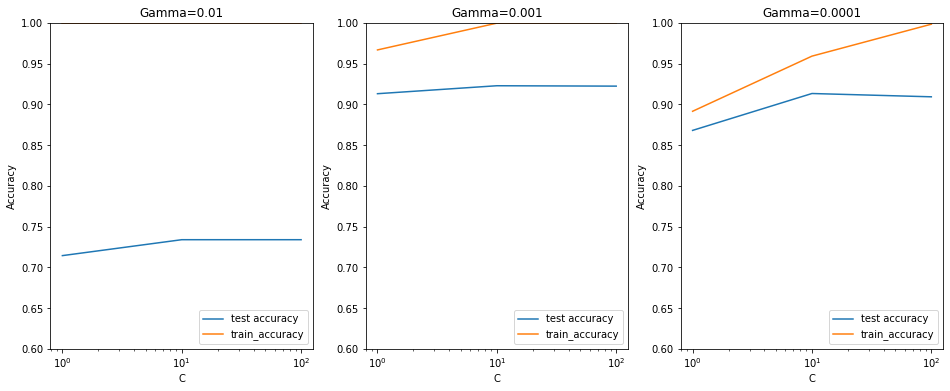

In [45]:
#converting C to numeric type
cv_results['param_C'] = cv_results['param_C'].astype('int')

#plotting
plt.figure(figsize=(16,6))

#subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(["test accuracy", "train_accuracy"], loc="lower right")
plt.xscale('log')

#subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(["test accuracy", "train_accuracy"], loc="lower right")
plt.xscale('log')

#subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel("Accuracy")
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(["test accuracy", "train_accuracy"], loc="lower right")
plt.xscale('log')

plt.show()

#### Final Model

In [46]:
#optimal hyperparameters
best_score = clf.best_score_
best_hyper_params = clf.best_params_

print("The best test score is {} corresponding to hyperparameter {}".format(best_score, best_hyper_params))

The best test score is 0.9228571428571428 corresponding to hyperparameter {'C': 10, 'gamma': 0.001}


In [47]:
#model
svm_final = svm.SVC(kernel="rbf", C=10, gamma=0.001)

#fit
svm_final.fit(X_train, y_train)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
#predict
predictions = svm_final.predict(X_test)

In [49]:
#evaluation
confusion = metrics.confusion_matrix(y_true=y_test, y_pred=predictions)

t_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print("Accuracy: ", t_accuracy, "\n")

print(confusion)

Accuracy:  0.9318783068783069 

[[3615    0   10   12    4   12   38   11   11    2]
 [   0 4107   13   18    6    2    5   21    8    5]
 [  30   20 3438   60   37    4   37  112   41   11]
 [   8    9   92 3547    5   88    6   71   44   30]
 [   4   10   32    5 3460   11   33   46    3   98]
 [  22   21   12  114   20 3059   62   50   31   27]
 [  27    7   11    1    9   27 3548   47   16    0]
 [   5   22   21   11   49    4    2 3749   10   81]
 [  10   37   47   79   21   82   25   49 3290   25]
 [  15    7   18   28   97   12    0  174   15 3412]]
